In [1]:
%%capture
from jupyter_tikz import TexFragment
import os, sys
from IPython.display import display, HTML, Markdown, Math

# To find local version of the library
sys.path.append('../src')

from pmule import PredecessorTable, ProjectGraph
%mkdir -p ~/temp
%cd ~/temp

# Enunciado

Considere el proyecto cuya información se adjunta.

In [2]:
pregunta_1 = "1. Dibuje el grafo PERT y determine el camino crítico.  "
pregunta_2 = "2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.  "
pregunta_3 = "3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.  "
pregunta_4 = "4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.  "
pregunta_5 = """5. Duración del proyecto si se introducen los siguientes cambios:
      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
      - La tarea K se inicia cuando F está a mitad de su ejecución"""

In [3]:
display(Markdown(pregunta_1))
display(Markdown(pregunta_2))
display(Markdown(pregunta_3))
display(Markdown(pregunta_4))
display(Markdown(pregunta_5))

1. Dibuje el grafo PERT y determine el camino crítico.  

2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.  

3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.  

4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.  

5. Duración del proyecto si se introducen los siguientes cambios:
      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
      - La tarea K se inicia cuando F está a mitad de su ejecución

In [4]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_tope, cur, recursos
     ('A',       '---  ',     4,         1,          25,     2    ),
     ('B',       'A    ',     4,         1,          25,     1    ),
     ('C',       'A    ',     5,         2,          20,     2    ),
     ('D',       'A    ',     4,         1,          10,     2    ),
     ('E',       'A    ',     3,         2,          50,     2    ),
     ('F',       'D,E  ',     6,         3,          30,     4    ),
     ('G',       'F    ',     4,         1,          25,     1    ),
     ('H',       'B,C,G',     7,         4,          20,     1    ),
     ('I',       'C,G  ',     5,         2,          20,     3    ),
     ('J',       'I    ',     4,         1,          25,     4    ),
     ('K',       'F    ',     4,         1,          25,     1    ),
     ('L',       'H    ',     8,         5,          10,     2    ),
     ('M',       'I,K  ',     4,         1,          25,     1    ),

] ,columns=['activity', 'predecessor', 'duration', 'cap_duration', 'ucr', 'resources']).set_index('activity')

datos_enunciado

,predecessor,duration,cap_duration,ucr,resources
activity,,,,,
A,---,4,1,25,2
B,A,4,1,25,1
C,A,5,2,20,2
D,A,4,1,10,2
E,A,3,2,50,2
F,"D,E",6,3,30,4
G,F,4,1,25,1
H,"B,C,G",7,4,20,1
I,"C,G",5,2,20,3


# Solución
## Apartado 1

In [5]:
display(Markdown(pregunta_1))

1. Dibuje el grafo PERT y determine el camino crítico.  

In [6]:
datos_proyecto = datos_enunciado.copy()
prelaciones = PredecessorTable.from_dataframe_of_strings(datos_proyecto, activity='activity', predecessor='predecessor')
prelaciones.display_immediate_linkage_matrix()

,A,B,C,D,E,F,G,H,I,J,K,L,M
activities,,,,,,,,,,,,,
A,,,,,,,,,,,,,
B,True,,,,,,,,,,,,
C,True,,,,,,,,,,,,
D,True,,,,,,,,,,,,
E,True,,,,,,,,,,,,
F,,,,True,True,,,,,,,,
G,,,,,,True,,,,,,,
H,,True,True,,,,True,,,,,,
I,,,True,,,,True,,,,,,


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

##### Grafo PERT con numeración de nodos

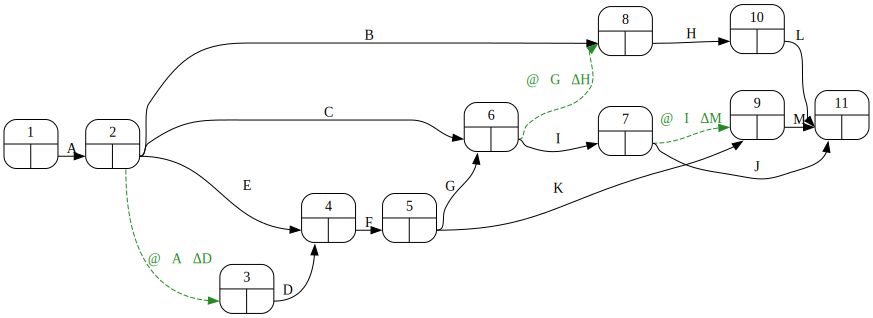

In [7]:
proyecto = prelaciones.create_project()
proyecto.pert(ranksep=0.25)

##### Matriz de Zaderenko

In [8]:
proyecto.zaderenko(datos_proyecto['duration'])

,1,2,3,4,5,6,7,8,9,10,11,early
1,,4.0,,,,,,,,,,0.0
2,,,0.0,3.0,,5.0,,4.0,,,,4.0
3,,,,4.0,,,,,,,,4.0
4,,,,,6.0,,,,,,,8.0
5,,,,,,4.0,,,4.0,,,14.0
6,,,,,,,5.0,0.0,,,,18.0
7,,,,,,,,,0.0,,4.0,23.0
8,,,,,,,,,,7.0,,18.0
9,,,,,,,,,,,4.0,23.0
10,,,,,,,,,,,8.0,25.0


In [9]:
resultados_pert = proyecto.calculate_pert(datos_proyecto['duration'])
resultados_pert['nodes']

,early,late
1,0,0
2,4,4
3,4,4
4,8,8
5,14,14
6,18,18
7,23,29
8,18,18
9,23,29
10,25,25


##### Holguras

In [10]:
resultados_pert['activities']

,H_total
@∇A⤑ΔD,0
@∇G⤑ΔH,0
@∇I⤑ΔM,6
A,0
B,10
C,9
D,0
E,1
F,0
G,0


###### Camino crítico

In [11]:
camino_critico = proyecto.critical_path(datos_proyecto['duration'])
camino_critico

{'Route_5': ['A', 'D', 'F', 'G', 'H', 'L']}

##### Grafo PERT con indicación de tiempos

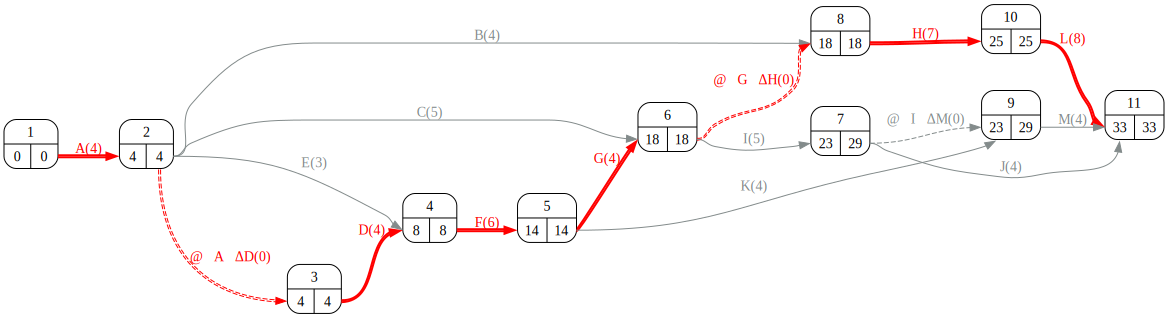

In [12]:
proyecto.pert(durations=datos_proyecto['duration'])

## Apartado 2

In [13]:
display(Markdown(pregunta_2))

2. Indique sus actuaciones si existiera un límite de disponibilidad de recursos durante los primeros 7 periodos igual a 3 unidades.  

#### Situación inicial
Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

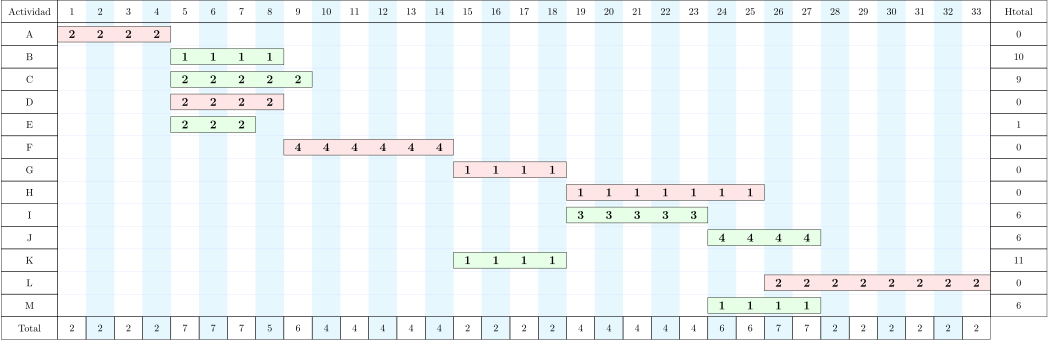

In [14]:
proyecto_asignacion = proyecto.copy()
gantt_recursos, dibujo = proyecto_asignacion.gantt(datos_proyecto, 'duration', 'resources', total='fila', holguras = True, tikz=True)
TexFragment(dibujo, tikz_libraries='patterns').run_latex()

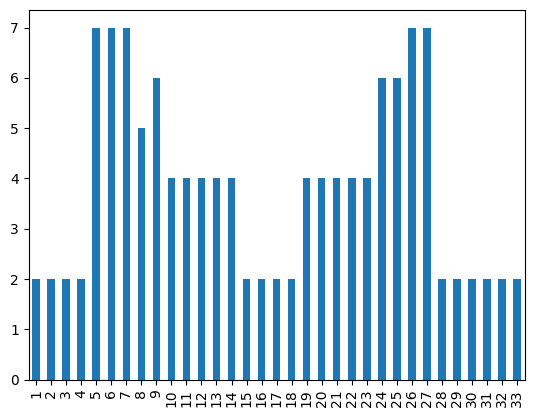

In [15]:
(gantt_recursos.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda de recursos actual infringe el límite impuesto durante los primeros 7 periodos. Es necesario aplicar el algoritmo de asignación.

#### Algoritmo de asignación

 El primer periodo problemático es el 5.

##### Asignación periodo 5

De las actividades inicialmente programadas para el periodo 5, la tarea D es crítica y por tanto se prefiere mantener su ejecución en tal fecha. Esto implica programar 2 recursos para ese periodo. Del resto de actividades tan sólo puede programar la B por consumir 1 recurso y ya completar alcanzar el límite de 3 recursos.

Suma de cuadrados: 598 



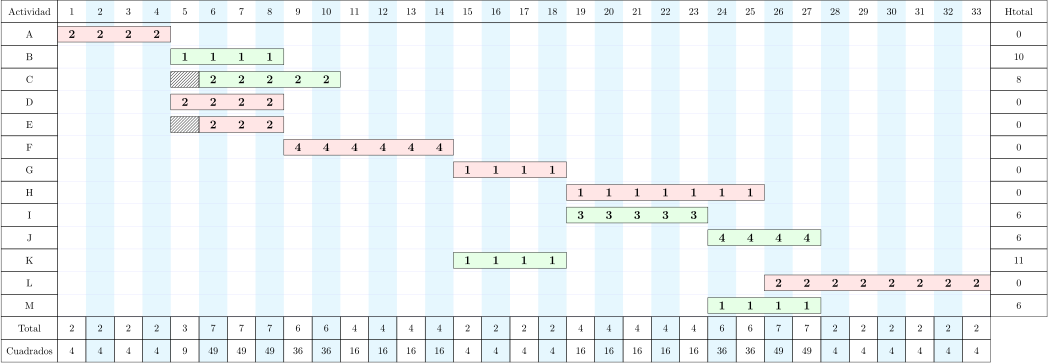

In [16]:
duracion_y_recursos = datos_proyecto[['duration', 'resources']]
duracion_y_recursos, gantt_df, dibujo = proyecto_asignacion.desplazar(duracion_y_recursos, 'duration', 'resources', tikz=True,
                                                                      C = 1, E = 1)
TexFragment(dibujo, tikz_libraries='patterns').run_latex()

La zona rayada representa el desplazamiento de las actividades C y E respectivamente. Nótese como la actividad E se ha vuelto crítica.

El siguiente periodo problemático es el 6.

##### Asignación periodo 6

Al encontrase en ejecución las actividades B y D se mantiene su ejecución retrasando el resto. Esto conlleva un retraso del proyecto al ser ya crítica la actividad E.

Suma de cuadrados: 574 



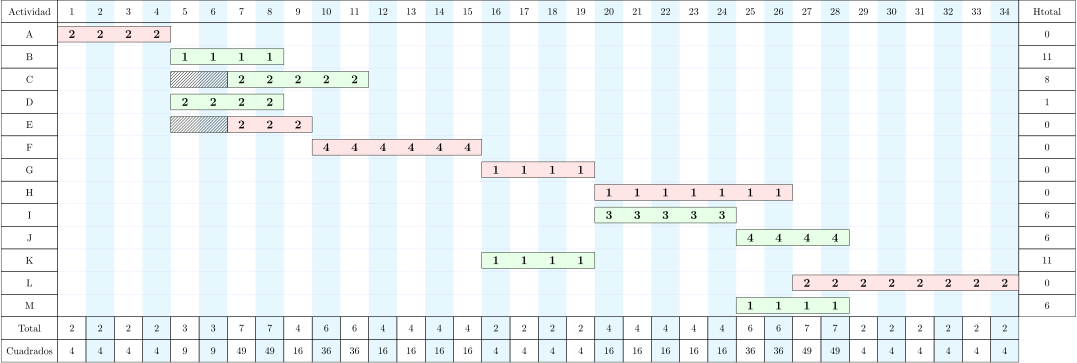

In [17]:
duracion_y_recursos, gantt_df, dibujo = proyecto_asignacion.desplazar(duracion_y_recursos, 'duration', 'resources', tikz=True,
                                                                      C = 1, E = 1)
TexFragment(dibujo, tikz_libraries='patterns').run_latex()

El siguiente periodo problemático es el 7.

##### Asignación periodo 7

Al encontrase en ejecución las actividades B y D se mantiene su ejecución retrasando el resto. Esto conlleva un nuevo retraso del proyecto al ser crítica la actividad E.

Suma de cuadrados: 550 



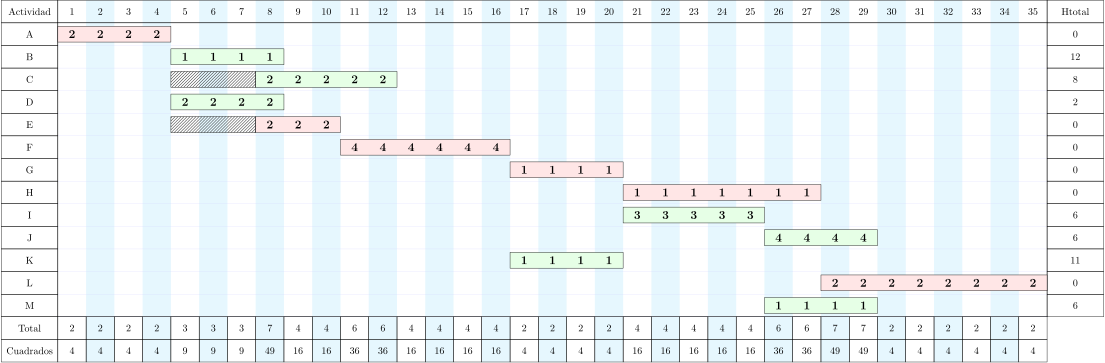

In [18]:
duracion_y_recursos, gantt_df, dibujo = proyecto_asignacion.desplazar(duracion_y_recursos, 'duration', 'resources', tikz=True,
                                                                      C = 1, E = 1)
TexFragment(dibujo, tikz_libraries='patterns').run_latex()

Con las operaciones indicadas el proyecto sería compatible con la restricción en el límite de recursos disponibles impuesta en el enunciado del ejercicio.

## Apartado 3

In [19]:
display(Markdown(pregunta_3))

3. Indique sus actuaciones para reducir la duración del proyecto hasta 28 periodos con un mínimo sobrecoste añadido.  

In [20]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                                                           min_durations=datos_proyecto['cap_duration'],
                                                           costs=datos_proyecto['ucr'],
                                                           reduction=5
                                                           )
ackoff

Step: 0,	 Critical paths: ['Route_5']
		 Best option: ['D'], 	 Cost: 10
Step: 1,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['L'], 	 Cost: 10
Step: 2,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['L'], 	 Cost: 10
Step: 3,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['L'], 	 Cost: 10
Step: 4,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['H'], 	 Cost: 20

--------------------------------------------------------------------------------


,A,B,C,D,E,F,G,H,I,J,K,L,M,0,1,2,3,4,5
Route_1,25.0,25.0,,,,,,20.0,,,,10.0,,23.0,23.0,22.0,21.0,20.0,19.0
Route_2,25.0,,20.0,,,,,20.0,,,,10.0,,24.0,24.0,23.0,22.0,21.0,20.0
Route_3,25.0,,20.0,,,,,,20.0,25.0,,,,18.0,18.0,18.0,18.0,18.0,18.0
Route_4,25.0,,20.0,,,,,,20.0,,,,25.0,18.0,18.0,18.0,18.0,18.0,18.0
Route_5,25.0,,,10.0,,30.0,25.0,20.0,,,,10.0,,33.0,32.0,31.0,30.0,29.0,28.0
Route_6,25.0,,,10.0,,30.0,25.0,,20.0,25.0,,,,27.0,26.0,26.0,26.0,26.0,26.0
Route_7,25.0,,,10.0,,30.0,25.0,,20.0,,,,25.0,27.0,26.0,26.0,26.0,26.0,26.0
Route_8,25.0,,,10.0,,30.0,,,,,25.0,,25.0,22.0,21.0,21.0,21.0,21.0,21.0
Route_9,25.0,,,,50.0,30.0,25.0,20.0,,,,10.0,,32.0,32.0,31.0,30.0,29.0,28.0
Route_10,25.0,,,,50.0,30.0,25.0,,20.0,25.0,,,,26.0,26.0,26.0,26.0,26.0,26.0


## Apartado 4

In [21]:
display(Markdown(pregunta_4))

4. Indique sus actuaciones para reducir la duración del proyecto hasta su duración tope con un mínimo sobrecoste añadido.  

Calculamos la duración del proyecto utilizando las duraciones tope y posteriormente alargaremos la duración de las tareas no críticas que han sido recortadas ineficientemente.

In [22]:
ackoff, best_option, duration, available = proyecto.ackoff(durations=datos_proyecto['duration'],
                                                           min_durations=datos_proyecto['cap_duration'],
                                                           costs=datos_proyecto['ucr'],
                                                           )
ackoff

Step: 0,	 Critical paths: ['Route_5']
		 Best option: ['D'], 	 Cost: 10
Step: 1,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['L'], 	 Cost: 10
Step: 2,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['L'], 	 Cost: 10
Step: 3,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['L'], 	 Cost: 10
Step: 4,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['H'], 	 Cost: 20
Step: 5,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['H'], 	 Cost: 20
Step: 6,	 Critical paths: ['Route_5', 'Route_9']
		 Best option: ['H'], 	 Cost: 20
Step: 7,	 Critical paths: ['Route_5', 'Route_6', 'Route_7', 'Route_9', 'Route_10', 'Route_11']
		 Best option: ['A'], 	 Cost: 25
Step: 8,	 Critical paths: ['Route_5', 'Route_6', 'Route_7', 'Route_9', 'Route_10', 'Route_11']
		 Best option: ['A'], 	 Cost: 25
Step: 9,	 Critical paths: ['Route_5', 'Route_6', 'Route_7', 'Route_9', 'Route_10', 'Route_11']
		 Best option: ['A'], 	 Cost: 25
Step: 10,	 Critical paths: ['Route_5', 'Rou

,A,B,C,D,E,F,G,H,I,J,K,L,M,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Route_1,25.0,25.0,,,,,,20.0,,,,10.0,,23.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
Route_2,25.0,,20.0,,,,,20.0,,,,10.0,,24.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Route_3,25.0,,20.0,,,,,,20.0,25.0,,,,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Route_4,25.0,,20.0,,,,,,20.0,,,,25.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,17.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
Route_5,25.0,,,10.0,,30.0,25.0,20.0,,,,10.0,,33.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_6,25.0,,,10.0,,30.0,25.0,,20.0,25.0,,,,27.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_7,25.0,,,10.0,,30.0,25.0,,20.0,,,,25.0,27.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_8,25.0,,,10.0,,30.0,,,,,25.0,,25.0,22.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,20.0,19.0,18.0,18.0,18.0,18.0,17.0,16.0,15.0,14.0
Route_9,25.0,,,,50.0,30.0,25.0,20.0,,,,10.0,,32.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0
Route_10,25.0,,,,50.0,30.0,25.0,,20.0,25.0,,,,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,25.0,24.0,23.0,22.0,21.0,20.0,19.0,18.0,17.0,16.0


## Apartado 5

In [23]:
display(Markdown(pregunta_5))

5. Duración del proyecto si se introducen los siguientes cambios:
      - Entre el final de la actividad H y el comienzo de la L deben transcurrir 2 periodos.
      - La tarea K se inicia cuando F está a mitad de su ejecución

La solución de este apartado precisa:
   - Introducir una actividad ficticia tras el final de H y anterior a L con duración 2 periodos.
   - Partir la actividad F en dos partes F1 y F2 e iniciar K tras el final de F1.

In [24]:
prelaciones_modificadas =  PredecessorTable.from_dict_of_sets(
    {
          'A': set(),
          'B': {'A'},
          'C': {'A'},
          'D': {'A'},
          'E': {'A'},
          'F1': {'D', 'E'},        # This is different. F1 represents the first part of F
          'F2': {'F1'},            # This is different. F2 represents the second part of F
          'G': {'F2'},             # This is different
          'H': {'B', 'C', 'G'},
          'I': {'C', 'G'},
          'J': {'I'},
          'K': {'F1'},           # This is different
          '💤L': {'H'},         # This is different. zzzL represent the waiting period before L can start.
          'L': {'💤L'},
          'M': {'I', 'K'}
    }
)

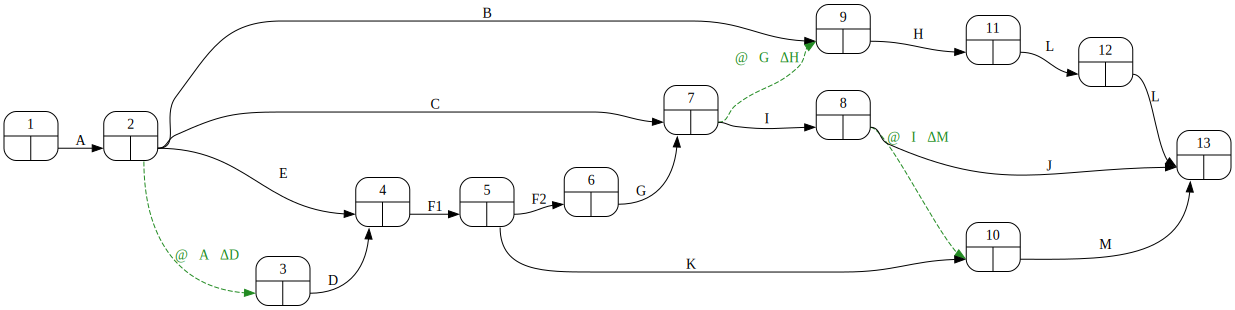

In [25]:
proyecto_modificado = prelaciones_modificadas.create_project()
proyecto_modificado.pert()

##### Grafo PERT con numeración de nodos

In [26]:
duracion_modificado = datos_proyecto['duration'].drop('F')
duracion_modificado['F1'] = 3
duracion_modificado['F2'] = 3
duracion_modificado['💤L'] = 2

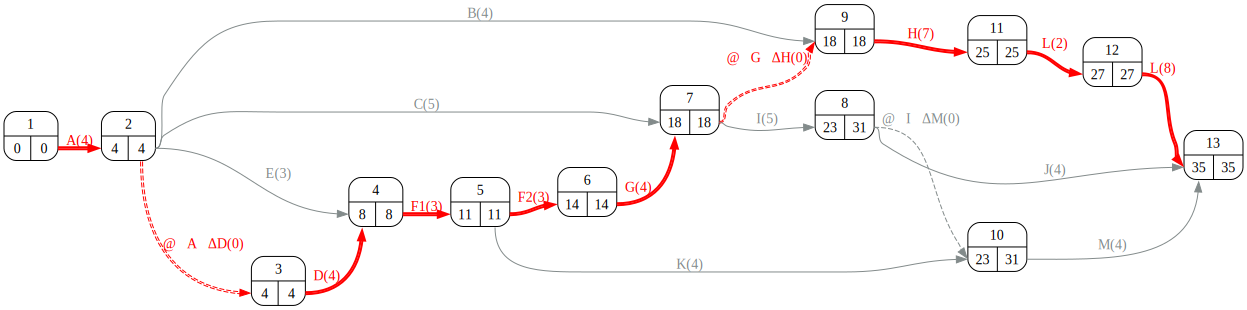

In [27]:
proyecto_modificado.pert(durations=duracion_modificado, ranksep=0.25)